## Задача

- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [x] * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

### Тестовый стенд
- Процессор: Apple M3 Pro (6 производительных ядер, 6 - энергоэффективных)
- Оперативная память: 32Гб
- Графика: Встроенная графика Apple M3 Pro (12 ядер)
- Операционная система: macOS Sequoia 15.2

### Датасет
Для эксперимента будет использован [датасет Handwritten A-Z](https://www.kaggle.com/datasets/ashishguptajiit/handwritten-az/data).
> There are total 785 columns, each row consists an image of alphabets. The first coloumn represents the alphabet numbering from 0-25 as A-Z

### EDA

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore')
dataset_path = pathlib.Path().resolve() / "datasets" / "task06_data.csv"

df = pd.read_csv(dataset_path)

rename_dict = {}
i = -1

for column in df:
    rename_dict[column] = f"{i}"
    i += 1

df.rename(columns=rename_dict, inplace=True)
df.rename(columns={"-1": "label"}, inplace=True)
df.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 785 entries, label to 783
dtypes: int64(785)
memory usage: 644.1 KB


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Уменьшаем размерность данных. PCA & t-SNE

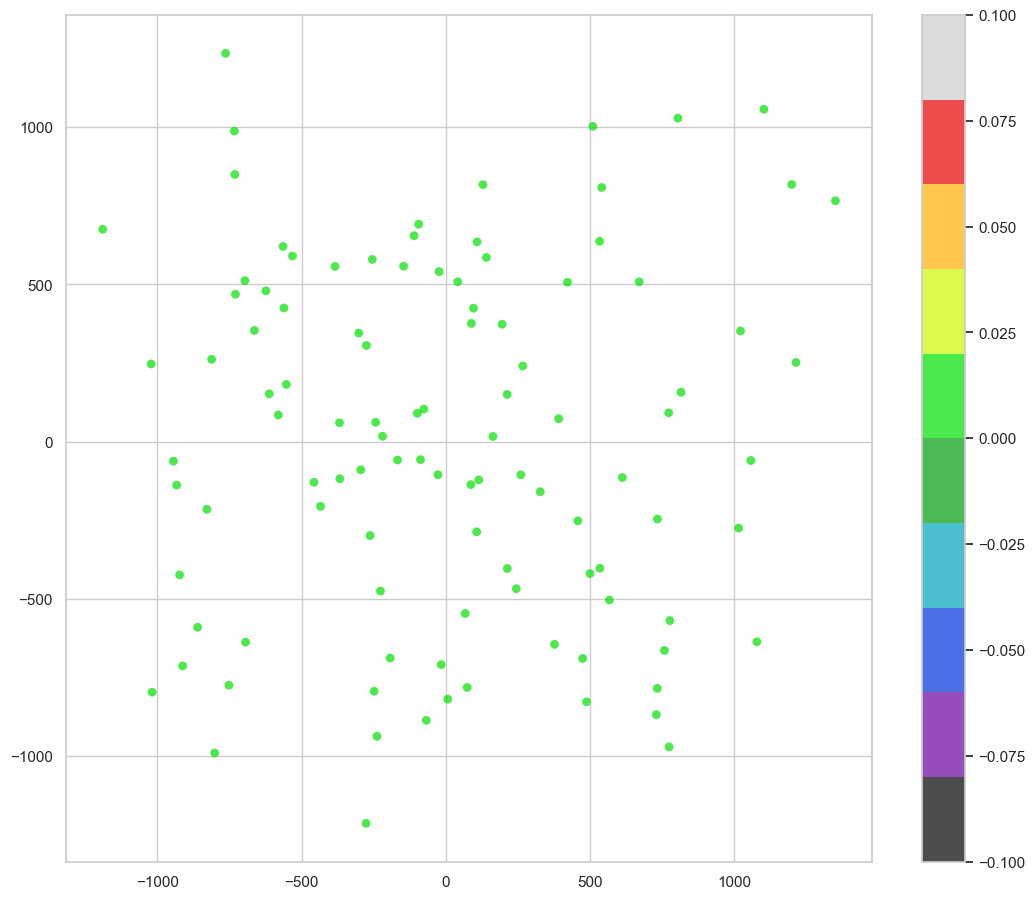

In [17]:
pca = PCA()
pca_res = pca.fit_transform(df)

plt.figure(figsize=(13, 11))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=df['label'],
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

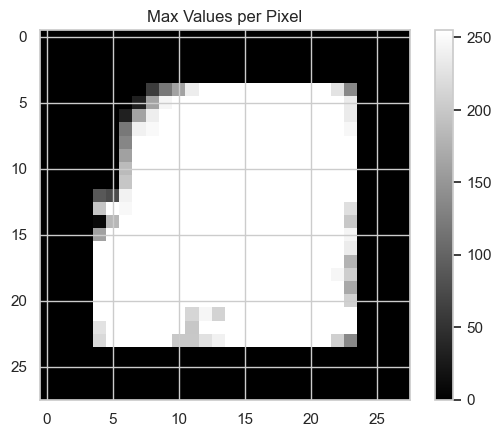

In [18]:
df_without_label = df.drop(columns=['label'])

plt.imshow(df_without_label.max().values.reshape([28, 28]), cmap="gray")
plt.title('Max Values per Pixel')
plt.colorbar()
plt.show()

Можно наблюдать большое количество неиспользуемых пикселей, что означает возможность их сокращения.
Посчитаем дисперсию:

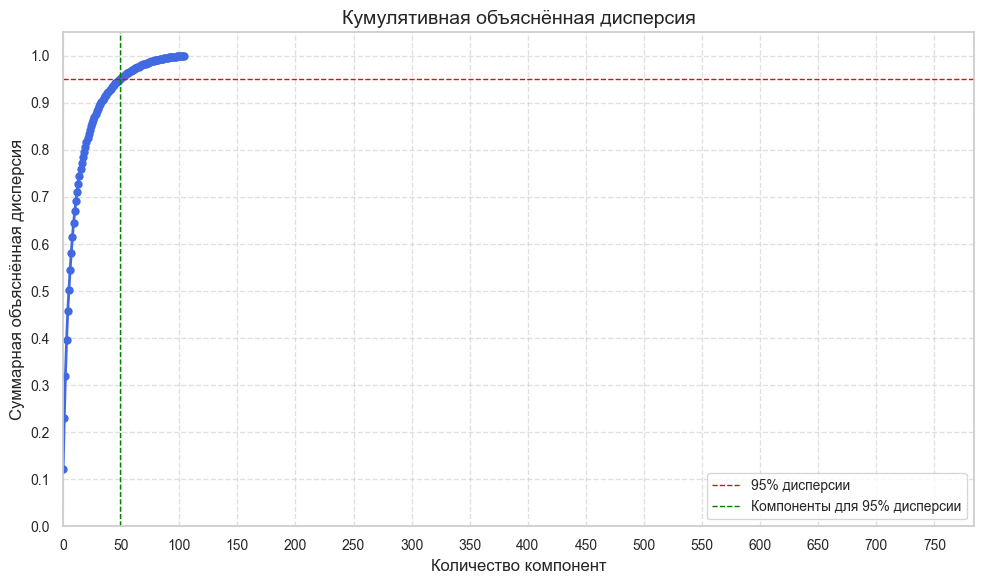

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 
         color='royalblue', linewidth=2, marker='o', markersize=5)

plt.xlabel("Количество компонент", fontsize=12)
plt.ylabel("Суммарная объяснённая дисперсия", fontsize=12)
plt.title("Кумулятивная объяснённая дисперсия", fontsize=14)

plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.xticks(np.arange(0, 28 * 28 + 1, 50), fontsize=10)
plt.xlim(0, 28 * 28)
plt.ylim(0, 1.05)

plt.axhline(y=0.95, color='red', linestyle='--', linewidth=1, label='95% дисперсии')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95), 
            color='green', linestyle='--', linewidth=1, label='Компоненты для 95% дисперсии')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

Можно наблюдать, что при размерности 50 можно описать 95% дисперсии, при 40 - 80%.

### Алгоритм

In [20]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted
import numpy as np

class SelfWritedKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=10, *, tol=1e-4, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = random_state

    def predict(self, x):
        check_is_fitted(self)
        x = check_array(x)
        return self._get_labels(x)

    def fit(self, x, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.max_iter = check_scalar(self.max_iter, "max_iter", int, min_val=1)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]
        self.cluster_centers_ = self._kmeans_plus_plus_init(x)

        max_center_shift = np.inf
        n_iter = 0

        while max_center_shift > self.tol and n_iter < self.max_iter:
            self.labels_ = self._get_labels(x)

            new_centers = np.array([x[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            max_center_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))

            self.cluster_centers_ = new_centers
            n_iter += 1

        return self

    def _kmeans_plus_plus_init(self, x):
        centers = np.empty((self.n_clusters, self.n_features_in_))
        centers[0] = x[self.random_state_.choice(len(x))]

        for i in range(1, self.n_clusters):
            distances = np.min(np.linalg.norm(x[:, np.newaxis] - centers[:i], axis=2), axis=1)
            probabilities = distances ** 2 / np.sum(distances ** 2)
            centers[i] = x[self.random_state_.choice(len(x), p=probabilities)]

        return centers

    def _get_labels(self, x):
        return np.argmin(np.linalg.norm(x[:, np.newaxis] - self.cluster_centers_, axis=2), axis=1)

In [21]:
import itertools
import time
import logging
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.base import clone
import numpy as np
import pandas as pd
import pathlib
from joblib import Parallel, delayed

logging.getLogger('matplotlib').setLevel(logging.WARNING)

xs = [df, *(PCA(n_components=i).fit_transform(df) for i in [20, 50, 100])]
labels = df['label']

def train(est, params):
    params_combs = [
        dict(param) for param in
        itertools.product(*([(name, v) for v in vs] for (name, vs) in params.items()))
    ]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for param in params_combs:
            e = clone(est).set_params(**param)
            start_time = time.perf_counter()
            pred = e.fit_predict(x)
            pred_time = (time.perf_counter() - start_time)

            ari = adjusted_rand_score(labels, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, pred_time, param

            ami = adjusted_mutual_info_score(labels, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, pred_time, param

            fmi = fowlkes_mallows_score(labels, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, pred_time, param

        res = {
            "cluster": est.__class__.__name__,
            "dimension": x.shape[1],
            "mean fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
            "best ari": best_ari[0],
            "best ami": best_ami[0],
            "best fmi": best_fmi[0]
        }

        results.append(res)



    path = pathlib.Path("train_res.csv")
    pd.DataFrame(results).to_csv(path, mode="a", header=not path.exists())

### Обучение
Для сравнения с самописным алгоритмом были выбраны алгоритмы KMeans и DBSCAN из sklearn

In [22]:
train(
    SelfWritedKMeans(n_clusters=10, random_state=0),
    params={}
)

from sklearn.cluster import KMeans, DBSCAN

train(
    KMeans(n_clusters=10, n_init='auto', random_state=0),
    params={"algorithm": ["lloyd", "elkan"]}
)

train(
    DBSCAN(n_jobs=4),
    params={
        "eps": [500, 600, 700],
        "min_samples": [40, 80, 120]
    }
)

### Сравнение результатов

<Figure size 1600x1200 with 0 Axes>

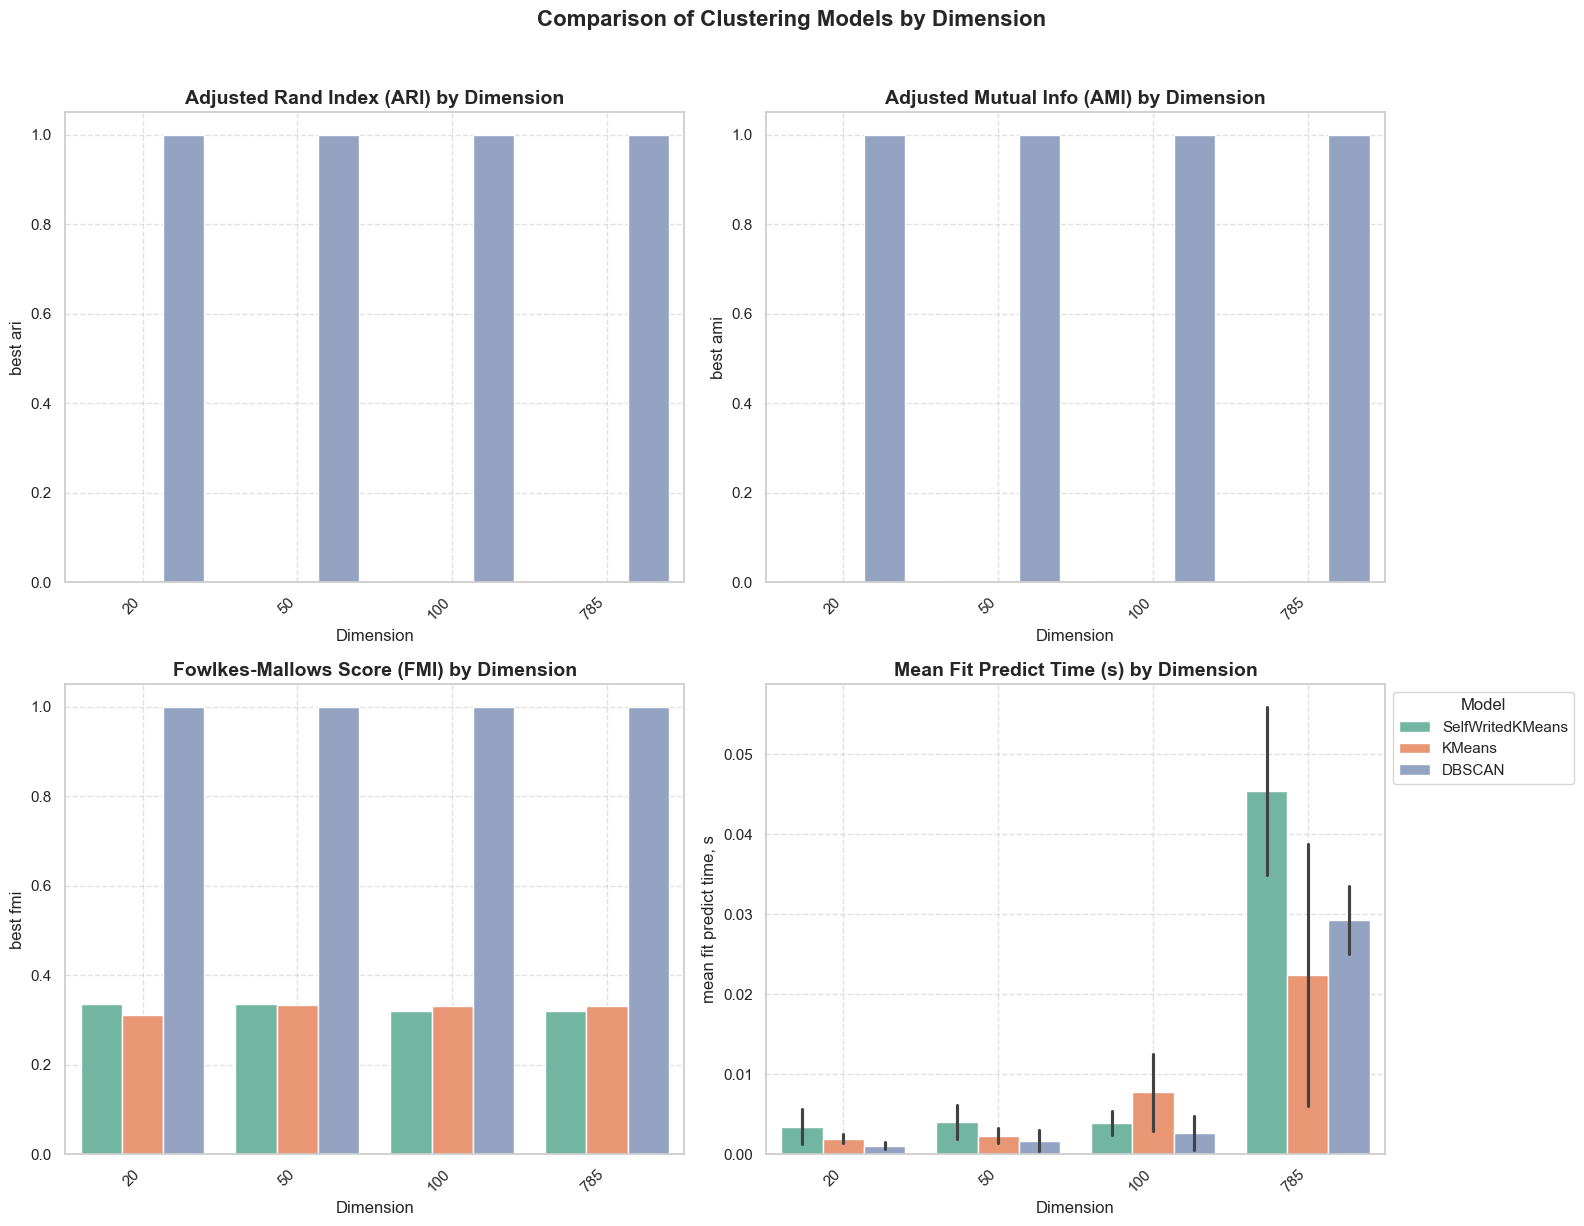

In [23]:
results = pd.read_csv(pathlib.Path("train_res.csv"))

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 12))

metrics = ["best ari", "best ami", "best fmi", "mean fit predict time, s"]
titles = [
    "Adjusted Rand Index (ARI) by Dimension",
    "Adjusted Mutual Info (AMI) by Dimension",
    "Fowlkes-Mallows Score (FMI) by Dimension",
    "Mean Fit Predict Time (s) by Dimension"
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, (y, title) in enumerate(zip(metrics, titles)):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=results, x="dimension", y=y, hue="cluster", ax=ax, palette="Set2")
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Dimension", fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    
    if y == "mean fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Model")
    else:
        ax.get_legend().remove()
    
    ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.suptitle("Comparison of Clustering Models by Dimension", fontsize=16, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()

Можно наблюдать, что в скорости обучения самописный KMeans проигрывает конкурентам из sklearn. Это связано с тем, что библиотечные алгоритмы в sklearn используют низкоуровневые оптимизации, такие как Cython и C++, что значительно ускоряет вычисления. Кроме того, sklearn.KMeans применяет векторизованные операции через numpy, что позволяет эффективно обрабатывать большие объемы данных. Самописный алгоритм, написанный на чистом Python, лишен этих преимуществ, что приводит к более медленному выполнению. Также sklearn.KMeans использует улучшенные методы инициализации, такие как k-means++, и поддерживает многопоточность, что дополнительно ускоряет процесс обучения.

Если оценивать качество кластеризации на основе Fowlkes-Mallows Score, можно сделать вывод, что наш алгоритм сопоставим в данном аспекте с библиотечным аналогом sklearn.KMeans. Это объясняется тем, что оба алгоритма реализуют схожую логику минимизации внутрикластерного расстояния, что приводит к похожим результатам. Однако оба алгоритма уступают sklearn.DBSCAN по качеству кластеризации. Это связано с тем, что DBSCAN способен находить кластеры произвольной формы, в то время как KMeans предполагает, что кластеры имеют сферическую форму. Кроме того, DBSCAN автоматически определяет число кластеров и устойчив к выбросам, что делает его более гибким и адаптивным к различным структурам данных.